# Sentiment Analysis Part 2

_Natural Langauge Processing Nanodegree Program_

---



## Step 5: Switching gears - RNNs

We just saw how the task of sentiment analysis can be solved via a traditional machine learning approach: BoW + a nonlinear classifier. We now switch gears and use Recurrent Neural Networks, and in particular LSTMs, to perform sentiment analysis in Keras. Conveniently, Keras has a built-in [IMDb movie reviews dataset](https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification) that we can use, with the same vocabulary size.

In [2]:
!pip install keras

    100% |████████████████████████████████| 378kB 2.4MB/s ta 0:00:01
    100% |████████████████████████████████| 276kB 8.2MB/s ta 0:00:01
    100% |████████████████████████████████| 2.9MB 3.5MB/s ta 0:00:011
    100% |████████████████████████████████| 51kB 8.0MB/s ta 0:00:011
    100% |████████████████████████████████| 51kB 16.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyyaml ... done
  Stored in directory: /Users/andrew/Library/Caches/pip/wheels/e4/76/4d/a95b8dd7b452b69e8ed4f68b69e1b55e12c9c9624dd962b191
Successfully built pyyaml
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!pip install tensorflow

    100% |████████████████████████████████| 120.8MB 354kB/s ta 0:00:011   23% |███████▌                        | 28.3MB 3.8MB/s eta 0:00:25    42% |█████████████▌                  | 51.1MB 5.4MB/s eta 0:00:14    42% |█████████████▊                  | 51.9MB 3.4MB/s eta 0:00:21    74% |███████████████████████▊        | 89.7MB 4.4MB/s eta 0:00:08
    100% |████████████████████████████████| 450kB 2.6MB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 5.0MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 6.0MB/s ta 0:00:011
    100% |████████████████████████████████| 1.3MB 3.2MB/s ta 0:00:01
    100% |████████████████████████████████| 4.7MB 3.6MB/s ta 0:00:01
    100% |████████████████████████████████| 3.8MB 2.9MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 6.4MB/s ta 0:00:011
    100% |████████████████████████████████| 28.3MB 1.1MB/s ta 0:00:011
    100% |████████████████████████████████| 14.8MB 1.7MB/s ta 0:00:011
    100% |██████████████████

    100% |████████████████████████████████| 163kB 2.4MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 2.9MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 5.6MB/s ta 0:00:011
  Running setup.py bdist_wheel for absl-py ... done
  Stored in directory: /Users/andrew/Library/Caches/pip/wheels/8e/28/49/fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
  Running setup.py bdist_wheel for wrapt ... done
  Stored in directory: /Users/andrew/Library/Caches/pip/wheels/d7/de/2e/efa132238792efb6459a96e85916ef8597fcb3d2ae51590dfd
  Running setup.py bdist_wheel for opt-einsum ... done
  Stored in directory: /Users/andrew/Library/Caches/pip/wheels/2c/b1/94/43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833
  Running setup.py bdist_wheel for termcolor ... done
  Stored in directory: /Users/andrew/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Running setup.py bdist_wheel for gast ... done
  Stored in directory: /Users/andrew/Libr

In [5]:
from keras.datasets import imdb  # import the built-in imdb dataset in Keras

# Set the vocabulary size
vocabulary_size = 5000

# Load in training and test data (note the difference in convention compared to scikit-learn)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)
print("Loaded dataset with {} training samples, {} test samples".format(len(X_train), len(X_test)))

Using TensorFlow backend.


17465344/17464789 [==============================] - 19s 1us/step
Loaded dataset with 25000 training samples, 25000 test samples


In [6]:
# Inspect a sample review and its label
print("--- Review ---")
print(X_train[7])
print("--- Label ---")
print(y_train[7])

--- Review ---
[1, 4, 2, 716, 4, 65, 7, 4, 689, 4367, 2, 2343, 4804, 2, 2, 2, 2, 2315, 2, 2, 2, 2, 4, 2, 628, 2, 37, 9, 150, 4, 2, 4069, 11, 2909, 4, 2, 847, 313, 6, 176, 2, 9, 2, 138, 9, 4434, 19, 4, 96, 183, 26, 4, 192, 15, 27, 2, 799, 2, 2, 588, 84, 11, 4, 3231, 152, 339, 2, 42, 4869, 2, 2, 345, 4804, 2, 142, 43, 218, 208, 54, 29, 853, 659, 46, 4, 882, 183, 80, 115, 30, 4, 172, 174, 10, 10, 1001, 398, 1001, 1055, 526, 34, 3717, 2, 2, 2, 17, 4, 2, 1094, 871, 64, 85, 22, 2030, 1109, 38, 230, 9, 4, 4324, 2, 251, 2, 1034, 195, 301, 14, 16, 31, 7, 4, 2, 8, 783, 2, 33, 4, 2945, 103, 465, 2, 42, 845, 45, 446, 11, 1895, 19, 184, 76, 32, 4, 2, 207, 110, 13, 197, 4, 2, 16, 601, 964, 2152, 595, 13, 258, 4, 1730, 66, 338, 55, 2, 4, 550, 728, 65, 1196, 8, 1839, 61, 1546, 42, 2, 61, 602, 120, 45, 2, 6, 320, 786, 99, 196, 2, 786, 2, 4, 225, 4, 373, 1009, 33, 4, 130, 63, 69, 72, 1104, 46, 1292, 225, 14, 66, 194, 2, 1703, 56, 8, 803, 1004, 6, 2, 155, 11, 4, 2, 3231, 45, 853, 2029, 8, 30, 6, 117, 430

Notice that the label is an integer (0 for negative, 1 for positive), and the review itself is stored as a sequence of integers. These are word IDs that have been preassigned to individual words. To map them back to the original words, you can use the dictionary returned by `imdb.get_word_index()`.

In [7]:
# Map word IDs back to words
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print("--- Review (with words) ---")
print([id2word.get(i, " ") for i in X_train[7]])
print("--- Label ---")
print(y_train[7])

1646592/1641221 [==============================] - 1s 1us/step
--- Review (with words) ---
['the', 'of', 'and', 'local', 'of', 'their', 'br', 'of', 'attention', 'widow', 'and', 'captures', 'parties', 'and', 'and', 'and', 'and', 'excitement', 'and', 'and', 'and', 'and', 'of', 'and', 'english', 'and', 'like', 'it', 'years', 'of', 'and', 'unintentional', 'this', 'hitchcock', 'of', 'and', 'learn', 'everyone', 'is', 'quite', 'and', 'it', 'and', 'such', 'it', 'bonus', 'film', 'of', 'too', 'seems', 'he', 'of', 'enough', 'for', 'be', 'and', 'editing', 'and', 'and', 'please', 'great', 'this', 'of', 'shoots', 'thing', '3', 'and', "it's", 'mentioning', 'and', 'and', 'given', 'parties', 'and', 'back', 'out', 'interesting', 'times', 'no', 'all', 'average', 'talking', 'some', 'of', 'nor', 'seems', 'into', 'best', 'at', 'of', 'every', 'cast', 'i', 'i', 'inside', 'keep', 'inside', 'large', 'viewer', 'who', 'obscure', 'and', 'and', 'and', 'movie', 'of', 'and', 'entirely', "you've", 'see', 'because', 'y

In [26]:
import numpy as np
print(max([len(x) for x in X_train]))
print(min([len(x) for x in X_train]))

2494
11


In [65]:
from collections import Counter
from itertools import chain
import matplotlib.pyplot as plt
%matplotlib inline

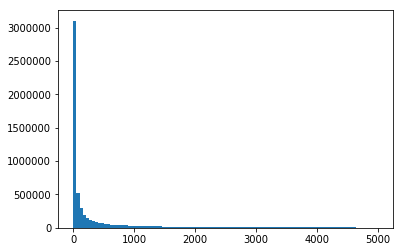

In [96]:
ctr = list(chain.from_iterable(X_train))
# ctr.values()
plt.hist(ctr, 100)
plt.show()

In [72]:
import math

In [73]:
pos_cnt = Counter()
neg_cnt = Counter()
for review,lbl in zip(X_train, y_train):
    if lbl == 1:
        pos_cnt.update(review)
    else:
        neg_cnt.update(review)
        
vocab = set(pos_cnt.keys()) | set(neg_cnt.keys())
pos_neg_ratios = Counter()
for w in vocab:
    pos_neg_ratios[w] = math.log(pos_cnt.get(w, 1) / neg_cnt.get(w, 1))

In [74]:
pos_neg_ratios

Counter({1: 0.0,
         2: 0.13097635521151332,
         4: 0.05851473289100667,
         5: 0.1875223646162327,
         6: 0.05271092536866767,
         7: 0.107792444593422,
         8: -0.03298557074379423,
         9: 0.13369613192495283,
         10: -0.06679554358812878,
         11: 0.1377180527819303,
         12: -0.00829775309195313,
         13: -0.11810135493330337,
         14: -0.15382883184672416,
         15: -0.03923870195974696,
         16: -0.1820552806640362,
         17: 0.2433140610518594,
         18: 0.022060215674009984,
         19: 0.10744198061172544,
         20: -0.2703894190257195,
         21: -0.04499044881583364,
         22: 0.08379371900175688,
         23: -0.010764114695864115,
         24: -0.13624433853309867,
         25: -0.0279162620703494,
         26: 0.012574507231922149,
         27: 0.3494928277819276,
         28: -0.18490066743895578,
         29: 0.19278843834064094,
         30: -0.1576658642029832,
         31: 0.0359862313197723

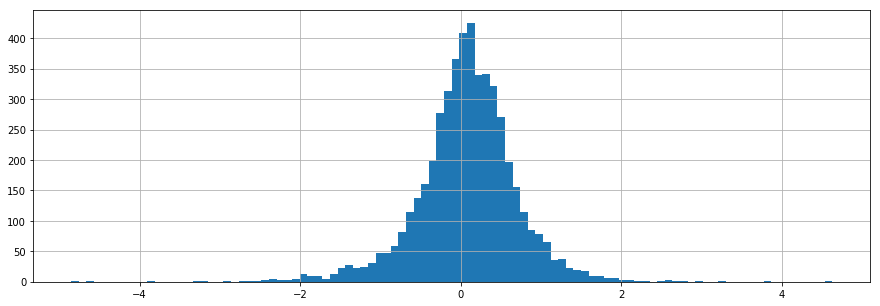

In [82]:
plt.figure(figsize=(15,5))
plt.hist(pos_neg_ratios.values(), 100)
plt.grid(True)
plt.show()

In [89]:
vocab_cut = {w for w in vocab if abs(pos_neg_ratios[w]) > 0.5 and (pos_cnt.get(w, 0) + neg_cnt.get(w, 0) > 50)}

In [92]:
len(vocab_cut)

1719

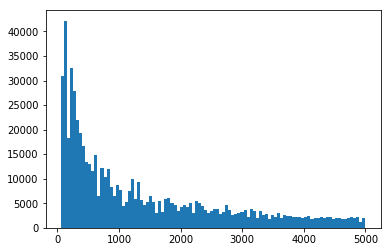

In [95]:
ctr = [w for w in chain.from_iterable(X_train) if w in vocab_cut]
# ctr.values()
plt.hist(ctr, 100)
plt.show()

In [94]:
ctr.most_common()

[(57, 12690),
 (78, 9270),
 (87, 9045),
 (113, 6556),
 (114, 6551),
 (116, 6477),
 (118, 6405),
 (119, 6392),
 (138, 5301),
 (155, 4498),
 (164, 4272),
 (182, 3686),
 (185, 3628),
 (199, 3404),
 (201, 3388),
 (210, 3237),
 (222, 3113),
 (223, 3097),
 (229, 3011),
 (232, 2944),
 (233, 2944),
 (234, 2943),
 (239, 2896),
 (241, 2856),
 (249, 2727),
 (253, 2679),
 (257, 2580),
 (272, 2409),
 (275, 2382),
 (278, 2349),
 (282, 2321),
 (283, 2320),
 (286, 2307),
 (287, 2304),
 (292, 2273),
 (294, 2241),
 (299, 2210),
 (300, 2198),
 (305, 2191),
 (307, 2170),
 (320, 2091),
 (321, 2065),
 (325, 2039),
 (326, 2037),
 (336, 1931),
 (338, 1896),
 (342, 1884),
 (345, 1866),
 (352, 1830),
 (354, 1821),
 (355, 1816),
 (356, 1811),
 (357, 1809),
 (358, 1809),
 (364, 1794),
 (373, 1721),
 (379, 1698),
 (384, 1681),
 (389, 1655),
 (394, 1635),
 (404, 1594),
 (406, 1587),
 (407, 1580),
 (408, 1577),
 (424, 1515),
 (426, 1491),
 (433, 1467),
 (437, 1456),
 (439, 1447),
 (447, 1428),
 (449, 1422),
 (455, 1

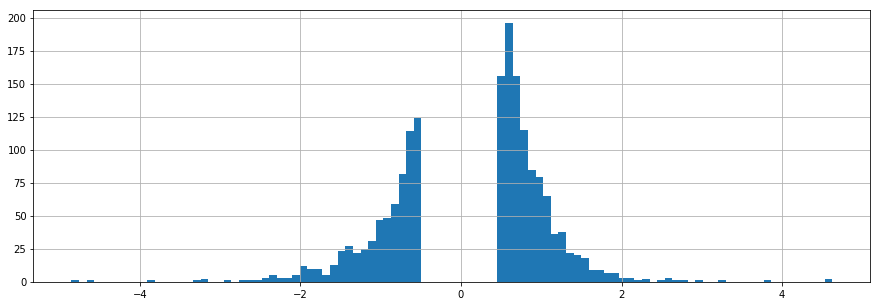

In [93]:
pos_neg_ratios_cut = Counter()
for w in vocab_cut:
    pos_neg_ratios_cut[w] = math.log(pos_cnt.get(w, 1) / neg_cnt.get(w, 1))
    
plt.figure(figsize=(15,5))
plt.hist(pos_neg_ratios_cut.values(), 100)
plt.grid(True)
plt.show()

In [97]:
#leave just words from reduced vocabulary
X_train = [[w for w in review if w in vocab_cut]for review in X_train]

Unlike our Bag-of-Words approach, where we simply summarized the counts of each word in a document, this representation essentially retains the entire sequence of words (minus punctuation, stopwords, etc.). This is critical for RNNs to function. But it also means that now the features can be of different lengths!

#### Question: Variable length reviews

What is the maximum review length (in terms of number of words) in the training set? What is the minimum?

#### Answer:

Maximum 2494 words
Minimum 11


### TODO: Pad sequences

In order to feed this data into your RNN, all input documents must have the same length. Let's limit the maximum review length to `max_words` by truncating longer reviews and padding shorter reviews with a null value (0). You can accomplish this easily using the [`pad_sequences()`](https://keras.io/preprocessing/sequence/#pad_sequences) function in Keras. For now, set `max_words` to 500.

In [98]:
from keras.preprocessing import sequence

# Set the maximum number of words per document (for both training and testing)
max_words = 500

# TODO: Pad sequences in X_train and X_test
X_train_pad = sequence.pad_sequences(X_train, maxlen=max_words, padding='pre', truncating='post')
X_test_pad = sequence.pad_sequences(X_test, maxlen=max_words, padding='pre', truncating='post')

In [99]:
X_train_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### TODO: Design an RNN model for sentiment analysis

Build your model architecture in the code cell below. We have imported some layers from Keras that you might need but feel free to use any other layers / transformations you like.

Remember that your input is a sequence of words (technically, integer word IDs) of maximum length = `max_words`, and your output is a binary sentiment label (0 or 1).

In [100]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# TODO: Design your model
model = Sequential()
model.add(Embedding(vocabulary_size, 32, input_length=max_words))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               82432     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 242,561
Trainable params: 242,561
Non-trainable params: 0
_________________________________________________________________
None


#### Question: Architecture and parameters

Briefly describe your neural net architecture. How many model parameters does it have that need to be trained?

#### Answer:

...

### TODO: Train and evaluate your model

Now you are ready to train your model. In Keras world, you first need to _compile_ your model by specifying the loss function and optimizer you want to use while training, as well as any evaluation metrics you'd like to measure. Specify the approprate parameters, including at least one metric `'accuracy'`.

In [101]:
# TODO: Compile your model, specifying a loss function, optimizer, and metrics
model.compile('adam', loss='mean_squared_error', metrics=['accuracy'])

Once compiled, you can kick off the training process. There are two important training parameters that you have to specify - **batch size** and **number of training epochs**, which together with your model architecture determine the total training time.

Training may take a while, so grab a cup of coffee, or better, go for a hike! If possible, consider using a GPU, as a single training run can take several hours on a CPU.

> **Tip**: You can split off a small portion of the training set to be used for validation during training. This will help monitor the training process and identify potential overfitting. You can supply a validation set to `model.fit()` using its `validation_data` parameter, or just specify `validation_split` - a fraction of the training data for Keras to set aside for this purpose (typically 5-10%). Validation metrics are evaluated once at the end of each epoch.

In [40]:
from keras.utils import to_categorical

In [41]:
y_train_pad = to_categorical(y_train, num_classes=2)
y_test_pad = to_categorical(y_test, num_classes=2)

In [102]:
# TODO: Specify training parameters: batch size and number of epochs
batch_size = 256
num_epochs = 5

# TODO(optional): Reserve/specify some training data for validation (not to be used for training)

# TODO: Train your model
model.fit(x=X_train_pad, y=y_train, batch_size=batch_size, epochs=num_epochs, validation_split=0.07)

/usr/local/Caskroom/miniconda/base/envs/hmm-tagger/lib/python3.5/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 23250 samples, validate on 1750 samples
Epoch 1/5
23250/23250 [==============================] - 224s 10ms/step - loss: 0.1784 - accuracy: 0.7847 - val_loss: 0.1110 - val_accuracy: 0.8520
Epoch 2/5
23250/23250 [==============================] - 221s 10ms/step - loss: 0.0890 - accuracy: 0.8800 - val_loss: 0.0879 - val_accuracy: 0.8857
Epoch 3/5
23250/23250 [==============================] - 215s 9ms/step - loss: 0.0764 - accuracy: 0.8989 - val_loss: 0.0854 - val_accuracy: 0.8931
Epoch 4/5
23250/23250 [==============================] - 216s 9ms/step - loss: 0.0723 - accuracy: 0.9047 - val_loss: 0.0865 - val_accuracy: 0.8880
Epoch 5/5
23250/23250 [==============================] - 221s 10ms/step - loss: 0.0690 - accuracy: 0.9105 - val_loss: 0.0856 - val_accuracy: 0.8903


### Results
Validation accuracy: 

0.8474 (full vocabulary with arch: Emb->LSTM(128)->Dense(1))

0.8903 (reduced vocab - min 50 occurences of word, above 0.5 ratio in pos_neg_ratios)

In [ ]:
# Save your model, so that you can quickly load it in future (and perhaps resume training)
model_file = "rnn_model.h5"  # HDF5 file
model.save(os.path.join(cache_dir, model_file))

# Later you can load it using keras.models.load_model()
#from keras.models import load_model
#model = load_model(os.path.join(cache_dir, model_file))

Once you have trained your model, it's time to see how well it performs on unseen test data.

In [103]:
# Evaluate your model on the test set
scores = model.evaluate(X_test_pad, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

Test accuracy: 0.7774400115013123


In [113]:
# Try just simple dense model
model_dense = Sequential()
# model_dense.add(Embedding(vocabulary_size, 32))
model_dense.add(Dense(32, activation='relu'))
model_dense.add(Dropout(0.3))
model_dense.add(Dense(1, activation='sigmoid'))

# print(model_dense.summary())

In [114]:
model_dense.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [116]:
def one_hot(X):
    hot = np.zeros((len(X), vocabulary_size))
    for i, xi in enumerate(X):
        hot[i][xi] = 1
    return hot

In [117]:
X_train_hot = one_hot(X_train)
X_test_hot = one_hot(X_test)

In [121]:
model_dense.fit(x=X_train_hot, y=y_train, batch_size=batch_size, epochs=num_epochs, validation_split=0.07)

Train on 23250 samples, validate on 1750 samples
Epoch 1/5
23250/23250 [==============================] - 1s 54us/step - loss: 0.1479 - accuracy: 0.8347 - val_loss: 0.1003 - val_accuracy: 0.8766
Epoch 2/5
23250/23250 [==============================] - 1s 39us/step - loss: 0.0907 - accuracy: 0.8852 - val_loss: 0.0889 - val_accuracy: 0.8863
Epoch 3/5
23250/23250 [==============================] - 1s 40us/step - loss: 0.0813 - accuracy: 0.8946 - val_loss: 0.0866 - val_accuracy: 0.8880
Epoch 4/5
23250/23250 [==============================] - 1s 38us/step - loss: 0.0771 - accuracy: 0.9003 - val_loss: 0.0865 - val_accuracy: 0.8840
Epoch 5/5
23250/23250 [==============================] - 1s 40us/step - loss: 0.0738 - accuracy: 0.9040 - val_loss: 0.0870 - val_accuracy: 0.8863


In [122]:
scores = model_dense.evaluate(X_test_hot, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

Test accuracy: 0.8708000183105469


#### Question: Comparing RNNs and Traditional Methods

How well does your RNN model perform compared to the BoW + Gradient-Boosted Decision Trees?

#### Answer:

...

## Extensions

There are several ways in which you can build upon this notebook. Each comes with its set of challenges, but can be a rewarding experience.

- The first thing is to try and improve the accuracy of your model by experimenting with different architectures, layers and parameters. How good can you get without taking prohibitively long to train? How do you prevent overfitting?

- Then, you may want to deploy your model as a mobile app or web service. What do you need to do in order to package your model for such deployment? How would you accept a new review, convert it into a form suitable for your model, and perform the actual prediction? (Note that the same environment you used during training may not be available.)

- One simplification we made in this notebook is to limit the task to binary classification. The dataset actually includes a more fine-grained review rating that is indicated in each review's filename (which is of the form `<[id]_[rating].txt>` where `[id]` is a unique identifier and `[rating]` is on a scale of 1-10; note that neutral reviews > 4 or < 7 have been excluded). How would you modify the notebook to perform regression on the review ratings? In what situations is regression more useful than classification, and vice-versa?

Whatever direction you take, make sure to share your results and learnings with your peers, through blogs, discussions and participating in online competitions. This is also a great way to become more visible to potential employers!